# 0. IMPORTACIONES DE SOFTWARE Y CÓDIGO

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import plotly.express as px
import numpy as np
from datetime import datetime

from utils.functions import reorder_columns, shorten_column_titles, clarify_name_acc

# I. IMPORTACION & PRIMERA EXPLORACIÓN DE LOS DATOS

In [11]:
#introduccion de nuestro primer fichero de datos:
acc_2016 = pd.read_excel("Data_ACC/datos_brutos/TF_ACCIDENTS_2016.xlsx")
acc_2016.head()

,DT_DAY,DT_HOUR,CD_DAY_OF_WEEK,TX_DAY_OF_WEEK_DESCR_FR,TX_DAY_OF_WEEK_DESCR_NL,CD_BUILD_UP_AREA,TX_BUILD_UP_AREA_DESCR_NL,TX_BUILD_UP_AREA_DESCR_FR,CD_COLL_TYPE,TX_COLL_TYPE_DESCR_NL,...,TX_PROV_DESCR_FR,CD_RGN_REFNIS,TX_RGN_DESCR_NL,TX_RGN_DESCR_FR,MS_ACCT,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ
0,2016-08-04,8,4,Jeudi,donderdag,2.0,Buiten bebouwde kom,Hors agglomération,3.0,Langs achteren (of naast elkaar),...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,0,1
1,2016-11-29,17,2,Mardi,dinsdag,2.0,Buiten bebouwde kom,Hors agglomération,4.0,Langs opzij,...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,1,0
2,2016-11-14,7,1,Lundi,maandag,2.0,Buiten bebouwde kom,Hors agglomération,7.0,Tegen een hindernis buiten de rijbaan,...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,0,1
3,2016-12-18,7,7,Dimanche,zondag,2.0,Buiten bebouwde kom,Hors agglomération,3.0,Langs achteren (of naast elkaar),...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,0,1
4,2016-08-05,11,5,Vendredi,vrijdag,1.0,Binnen bebouwde kom,En agglomération,2.0,Frontale botsing (of bij het kruisen),...,Province d’Anvers,2000,Vlaams Gewest,Région flamande,1,0,0,0,0,1


In [12]:
#aplicamos shape para tener primera idea de nº columnas y filas
acc_2016.shape

(39890, 35)

In [13]:
#más info sobre tipos de datos y valores ausentes en nuestro DF:
acc_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39890 entries, 0 to 39889
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DT_DAY                     39890 non-null  datetime64[ns]
 1   DT_HOUR                    39890 non-null  int64         
 2   CD_DAY_OF_WEEK             39890 non-null  int64         
 3   TX_DAY_OF_WEEK_DESCR_FR    39890 non-null  object        
 4   TX_DAY_OF_WEEK_DESCR_NL    39890 non-null  object        
 5   CD_BUILD_UP_AREA           36276 non-null  float64       
 6   TX_BUILD_UP_AREA_DESCR_NL  39890 non-null  object        
 7   TX_BUILD_UP_AREA_DESCR_FR  39890 non-null  object        
 8   CD_COLL_TYPE               37090 non-null  float64       
 9   TX_COLL_TYPE_DESCR_NL      39890 non-null  object        
 10  TX_COLL_TYPE_DESCR_FR      39890 non-null  object        
 11  CD_LIGHT_COND              37331 non-null  float64       
 12  TX_L

>> vistazo sobre todas las columnas + indicación de índice correspondiente:

In [14]:
#preparación para poder seleccionar por indice fluidamente las columnas relevantes (sin conteo manual):
todas_col = enumerate(acc_2016.columns)
for i in todas_col:
    print (i)

(0, 'DT_DAY')
(1, 'DT_HOUR')
(2, 'CD_DAY_OF_WEEK')
(3, 'TX_DAY_OF_WEEK_DESCR_FR')
(4, 'TX_DAY_OF_WEEK_DESCR_NL')
(5, 'CD_BUILD_UP_AREA')
(6, 'TX_BUILD_UP_AREA_DESCR_NL')
(7, 'TX_BUILD_UP_AREA_DESCR_FR')
(8, 'CD_COLL_TYPE')
(9, 'TX_COLL_TYPE_DESCR_NL')
(10, 'TX_COLL_TYPE_DESCR_FR')
(11, 'CD_LIGHT_COND')
(12, 'TX_LIGHT_COND_DESCR_NL')
(13, 'TX_LIGHT_COND_DESCR_FR')
(14, 'CD_ROAD_TYPE')
(15, 'TX_ROAD_TYPE_DESCR_NL')
(16, 'TX_ROAD_TYPE_DESCR_FR')
(17, 'CD_MUNTY_REFNIS')
(18, 'TX_MUNTY_DESCR_NL')
(19, 'TX_MUNTY_DESCR_FR')
(20, 'CD_DSTR_REFNIS')
(21, 'TX_ADM_DSTR_DESCR_NL')
(22, 'TX_ADM_DSTR_DESCR_FR')
(23, 'CD_PROV_REFNIS')
(24, 'TX_PROV_DESCR_NL')
(25, 'TX_PROV_DESCR_FR')
(26, 'CD_RGN_REFNIS')
(27, 'TX_RGN_DESCR_NL')
(28, 'TX_RGN_DESCR_FR')
(29, 'MS_ACCT')
(30, 'MS_ACCT_WITH_DEAD')
(31, 'MS_ACCT_WITH_DEAD_30_DAYS')
(32, 'MS_ACCT_WITH_MORY_INJ')
(33, 'MS_ACCT_WITH_SERLY_INJ')
(34, 'MS_ACCT_WITH_SLY_INJ')


In [15]:
#exploracion de nº accidentes por día
A = acc_2016.groupby(["CD_DAY_OF_WEEK"])["CD_DAY_OF_WEEK"].count()
A

CD_DAY_OF_WEEK
1    5565
2    5847
3    6146
4    6024
5    6466
6    5176
7    4666
Name: CD_DAY_OF_WEEK, dtype: int64

# II. LIMPIAR LOS DATOS DEL DATAFRAME PARA NUESTRO PROPÓSITO

## II.1. limpiar DB original (parte columnas): eliminar columnas irrelevantes

In [16]:
#mantener columnas relevantes solo - si opcion entre varias: selección de las en las cuales menos valores faltan
acc_2016_col = acc_2016.iloc[:,[0,2,6,12,15,18,21,24,27,29,30,31,32,33,34]]
acc_2016_col.head(5)

,DT_DAY,CD_DAY_OF_WEEK,TX_BUILD_UP_AREA_DESCR_NL,TX_LIGHT_COND_DESCR_NL,TX_ROAD_TYPE_DESCR_NL,TX_MUNTY_DESCR_NL,TX_ADM_DSTR_DESCR_NL,TX_PROV_DESCR_NL,TX_RGN_DESCR_NL,MS_ACCT,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ
0,2016-08-04,4,Buiten bebouwde kom,Bij klaarlichte dag,"Gewestweg, provincieweg of gemeenteweg",Aartselaar,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,0,1
1,2016-11-29,2,Buiten bebouwde kom,"Nacht, ontstoken openbare verlichting","Gewestweg, provincieweg of gemeenteweg",Aartselaar,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,1,0
2,2016-11-14,1,Buiten bebouwde kom,"Nacht, ontstoken openbare verlichting","Gewestweg, provincieweg of gemeenteweg",Aartselaar,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,0,1
3,2016-12-18,7,Buiten bebouwde kom,"Nacht, ontstoken openbare verlichting","Gewestweg, provincieweg of gemeenteweg",Aartselaar,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,0,1
4,2016-08-05,5,Binnen bebouwde kom,Bij klaarlichte dag,"Gewestweg, provincieweg of gemeenteweg",Aartselaar,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,0,1


In [17]:
#nuevo vistazo sobre tipos de datos y valores ausentes:
acc_2016_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39890 entries, 0 to 39889
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DT_DAY                     39890 non-null  datetime64[ns]
 1   CD_DAY_OF_WEEK             39890 non-null  int64         
 2   TX_BUILD_UP_AREA_DESCR_NL  39890 non-null  object        
 3   TX_LIGHT_COND_DESCR_NL     39890 non-null  object        
 4   TX_ROAD_TYPE_DESCR_NL      39890 non-null  object        
 5   TX_MUNTY_DESCR_NL          39890 non-null  object        
 6   TX_ADM_DSTR_DESCR_NL       39890 non-null  object        
 7   TX_PROV_DESCR_NL           36042 non-null  object        
 8   TX_RGN_DESCR_NL            39890 non-null  object        
 9   MS_ACCT                    39890 non-null  int64         
 10  MS_ACCT_WITH_DEAD          39890 non-null  int64         
 11  MS_ACCT_WITH_DEAD_30_DAYS  39890 non-null  int64         
 12  MS_A

In [ ]:
# deducción: solo en col[7] faltan valores - se deberían poder recuperar en base a col[8] 
# de momento todavía por determinar si hará falta (dependerá del nivel que seleccionaremos por zona)

## II.2. limpiar DB original (parte columnas): crear columna YEAR y MONTH, eliminar columna YEAR-MONTH-DAY

Con vistas a agrupaciones posteriores por día laboral vs. sábado vs. domingo, preparamos los datos necesarios para las agrupaciones. Para el proceso de elaboración concreta, referimos al fichero TEST_extraction YEAR DAY.

In [18]:
# primer paso: creamos unas nuevas columnas "YEAR" y "MONTH" a partir de la columna existente "DT_DAY"
acc_2016_col['YEAR'] = acc_2016_col['DT_DAY'].dt.year
acc_2016_col['MONTH'] = acc_2016_col['DT_DAY'].dt.month

C:\Users\piovr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\piovr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
# segundo paso: verificación: se ha extendido nuestro df de 2 columnas?
acc_2016_col.columns
# respuesta: sí

Index(['DT_DAY', 'CD_DAY_OF_WEEK', 'TX_BUILD_UP_AREA_DESCR_NL',
       'TX_LIGHT_COND_DESCR_NL', 'TX_ROAD_TYPE_DESCR_NL', 'TX_MUNTY_DESCR_NL',
       'TX_ADM_DSTR_DESCR_NL', 'TX_PROV_DESCR_NL', 'TX_RGN_DESCR_NL',
       'MS_ACCT', 'MS_ACCT_WITH_DEAD', 'MS_ACCT_WITH_DEAD_30_DAYS',
       'MS_ACCT_WITH_MORY_INJ', 'MS_ACCT_WITH_SERLY_INJ',
       'MS_ACCT_WITH_SLY_INJ', 'YEAR', 'MONTH'],
      dtype='object')

In [20]:
# tercer paso: eliminamos la primera columna (información relevante mejor distribuida en otra columnas, información no relevante (día) por eliminar)
acc_2016_col.pop("DT_DAY")

0       2016-08-04
1       2016-11-29
2       2016-11-14
3       2016-12-18
4       2016-08-05
           ...    
39885   2016-08-28
39886   2016-08-25
39887   2016-09-28
39888   2016-09-22
39889   2016-09-21
Name: DT_DAY, Length: 39890, dtype: datetime64[ns]

In [21]:
#cuarto paso: verificación de las columnas presentes:
acc_2016_col.columns

Index(['CD_DAY_OF_WEEK', 'TX_BUILD_UP_AREA_DESCR_NL', 'TX_LIGHT_COND_DESCR_NL',
       'TX_ROAD_TYPE_DESCR_NL', 'TX_MUNTY_DESCR_NL', 'TX_ADM_DSTR_DESCR_NL',
       'TX_PROV_DESCR_NL', 'TX_RGN_DESCR_NL', 'MS_ACCT', 'MS_ACCT_WITH_DEAD',
       'MS_ACCT_WITH_DEAD_30_DAYS', 'MS_ACCT_WITH_MORY_INJ',
       'MS_ACCT_WITH_SERLY_INJ', 'MS_ACCT_WITH_SLY_INJ', 'YEAR', 'MONTH'],
      dtype='object')

In [22]:
# quinto paso: desplazamos la última y penúltima columnas a primera y segunda posición de columna:
acc_2016_col_fila = reorder_columns(dataframe= acc_2016_col, col_name='YEAR', position=0)
#print(acc_2016_col_fila.columns)
acc_2016_col_filb = reorder_columns(dataframe= acc_2016_col_fila, col_name="MONTH", position=1)
print(acc_2016_col_filb.columns)

Index(['YEAR', 'MONTH', 'CD_DAY_OF_WEEK', 'TX_BUILD_UP_AREA_DESCR_NL',
       'TX_LIGHT_COND_DESCR_NL', 'TX_ROAD_TYPE_DESCR_NL', 'TX_MUNTY_DESCR_NL',
       'TX_ADM_DSTR_DESCR_NL', 'TX_PROV_DESCR_NL', 'TX_RGN_DESCR_NL',
       'MS_ACCT', 'MS_ACCT_WITH_DEAD', 'MS_ACCT_WITH_DEAD_30_DAYS',
       'MS_ACCT_WITH_MORY_INJ', 'MS_ACCT_WITH_SERLY_INJ',
       'MS_ACCT_WITH_SLY_INJ'],
      dtype='object')


## II.3. Limpiamos dataframe de valores NaN

In [23]:
#limpiamos el dataframe de valores 0, basándonos en la argumentación más detallada ya llevado a cabo en d_pobl_2016
acc_2016_col_filb['TX_PROV_DESCR_NL'] = acc_2016_col_filb['TX_PROV_DESCR_NL'].fillna("Arr. Brussel-Hfdstad[no Prov]")
acc_2016_col_filb.sample(5)

,YEAR,MONTH,CD_DAY_OF_WEEK,TX_BUILD_UP_AREA_DESCR_NL,TX_LIGHT_COND_DESCR_NL,TX_ROAD_TYPE_DESCR_NL,TX_MUNTY_DESCR_NL,TX_ADM_DSTR_DESCR_NL,TX_PROV_DESCR_NL,TX_RGN_DESCR_NL,MS_ACCT,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ
13583,2016,4,3,Binnen bebouwde kom,Bij klaarlichte dag,"Gewestweg, provincieweg of gemeenteweg",Wevelgem,Arrondissement Kortrijk,Provincie West-Vlaanderen,Vlaams Gewest,1,0,0,0,0,1
32746,2016,9,1,Binnen bebouwde kom,Bij klaarlichte dag,"Gewestweg, provincieweg of gemeenteweg",Namen,Arrondissement Namen,Provincie Namen,Waals Gewest,1,0,0,0,0,1
25968,2016,5,7,Binnen bebouwde kom,"Nacht, ontstoken openbare verlichting","Gewestweg, provincieweg of gemeenteweg",Chaudfontaine,Arrondissement Luik,Provincie Luik,Waals Gewest,1,0,0,0,0,1
26567,2016,4,1,Niet beschikbaar,Bij klaarlichte dag,"Gewestweg, provincieweg of gemeenteweg",Luik,Arrondissement Luik,Provincie Luik,Waals Gewest,1,0,0,0,0,1
13876,2016,5,5,Binnen bebouwde kom,Bij klaarlichte dag,"Gewestweg, provincieweg of gemeenteweg",Ichtegem,Arrondissement Oostende,Provincie West-Vlaanderen,Vlaams Gewest,1,0,0,0,1,0


In [24]:
#número de filas por controlar si queremos hacer un control 'visual':
len(acc_2016_col_filb)

39890

In [25]:
#dado que una verificación visual es más complicada aquí (nº de registros = 30102), nos apoyamos solo en el código para verificar 
# si con la transformación de arriba hemos conseguido eleminar todos los valores NaN:
acc_2016_col_filb.isnull().sum()

YEAR                         0
MONTH                        0
CD_DAY_OF_WEEK               0
TX_BUILD_UP_AREA_DESCR_NL    0
TX_LIGHT_COND_DESCR_NL       0
TX_ROAD_TYPE_DESCR_NL        0
TX_MUNTY_DESCR_NL            0
TX_ADM_DSTR_DESCR_NL         0
TX_PROV_DESCR_NL             0
TX_RGN_DESCR_NL              0
MS_ACCT                      0
MS_ACCT_WITH_DEAD            0
MS_ACCT_WITH_DEAD_30_DAYS    0
MS_ACCT_WITH_MORY_INJ        0
MS_ACCT_WITH_SERLY_INJ       0
MS_ACCT_WITH_SLY_INJ         0
dtype: int64

## II.4. LAYOUT: lectura: mejoramos nombres de títulos de/en nuestro dataframe
### II.4.1 Título de dataframe 

In [26]:
#simplicar nombre dataframe y verificación de que sigue funcionando bien al llamar:
acc_2016_base = acc_2016_col_filb
acc_2016_base.head(2)

,YEAR,MONTH,CD_DAY_OF_WEEK,TX_BUILD_UP_AREA_DESCR_NL,TX_LIGHT_COND_DESCR_NL,TX_ROAD_TYPE_DESCR_NL,TX_MUNTY_DESCR_NL,TX_ADM_DSTR_DESCR_NL,TX_PROV_DESCR_NL,TX_RGN_DESCR_NL,MS_ACCT,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ
0,2016,8,4,Buiten bebouwde kom,Bij klaarlichte dag,"Gewestweg, provincieweg of gemeenteweg",Aartselaar,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,0,1
1,2016,11,2,Buiten bebouwde kom,"Nacht, ontstoken openbare verlichting","Gewestweg, provincieweg of gemeenteweg",Aartselaar,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,1,0


### II.4.2. Título columnas: abreviaciones donde sea posible (según patrón iterativo)

In [27]:
#primer paso: renombrar títulos de columnas
acc_2016_base.columns = shorten_column_titles(acc_2016_base.columns)

In [28]:
#segundo paso: primera posibilidad de verificación:
print(acc_2016_base.columns)

Index(['YEAR', 'MONTH', 'CD_DAY_OF_WEEK', 'BUILD_UP_AREA', 'LIGHT_COND',
       'ROAD_TYPE', 'MUNTY', 'ADM_DSTR', 'PROV', 'RGN', 'MS_ACCT',
       'MS_ACCT_WITH_DEAD', 'MS_ACCT_WITH_DEAD_30_DAYS',
       'MS_ACCT_WITH_MORY_INJ', 'MS_ACCT_WITH_SERLY_INJ',
       'MS_ACCT_WITH_SLY_INJ'],
      dtype='object')


In [29]:
#segundo paso: segunda posibilidad de verificación (integración real en el dataframe):
acc_2016_base.sample()

,YEAR,MONTH,CD_DAY_OF_WEEK,BUILD_UP_AREA,LIGHT_COND,ROAD_TYPE,MUNTY,ADM_DSTR,PROV,RGN,MS_ACCT,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ
3087,2016,3,5,Binnen bebouwde kom,Bij klaarlichte dag,"Gewestweg, provincieweg of gemeenteweg",Hemiksem,Arrondissement Antwerpen,Provincie Antwerpen,Vlaams Gewest,1,0,0,0,0,1


### II.4.3. Título columnas accidentes: más transparencia

In [30]:
acc_2016_base.columns

Index(['YEAR', 'MONTH', 'CD_DAY_OF_WEEK', 'BUILD_UP_AREA', 'LIGHT_COND',
       'ROAD_TYPE', 'MUNTY', 'ADM_DSTR', 'PROV', 'RGN', 'MS_ACCT',
       'MS_ACCT_WITH_DEAD', 'MS_ACCT_WITH_DEAD_30_DAYS',
       'MS_ACCT_WITH_MORY_INJ', 'MS_ACCT_WITH_SERLY_INJ',
       'MS_ACCT_WITH_SLY_INJ'],
      dtype='object')

In [31]:
clarify_name_acc(acc_2016_base.columns)

['YEAR',
 'MONTH',
 'CD_DAY_OF_WEEK',
 'BUILD_UP_AREA',
 'LIGHT_COND',
 'ROAD_TYPE',
 'MUNTY',
 'ADM_DSTR',
 'PROV',
 'RGN',
 'Nº ACC',
 'Nº ACC_WITH_DEAD',
 'Nº ACC_WITH_DEAD_30_DAYS',
 'Nº ACC_WITH_MORY_INJ',
 'Nº ACC_WITH_SERLY_INJ',
 'Nº ACC_WITH_SLY_INJ']

In [32]:
acc_2016_base.columns = clarify_name_acc(acc_2016_base.columns)
#acc_2016_base = acc_2016_base.rename(columns={"MS_ACCT": "Nº ACCIDENTS"})
acc_2016_base.columns

Index(['YEAR', 'MONTH', 'CD_DAY_OF_WEEK', 'BUILD_UP_AREA', 'LIGHT_COND',
       'ROAD_TYPE', 'MUNTY', 'ADM_DSTR', 'PROV', 'RGN', 'Nº ACC',
       'Nº ACC_WITH_DEAD', 'Nº ACC_WITH_DEAD_30_DAYS', 'Nº ACC_WITH_MORY_INJ',
       'Nº ACC_WITH_SERLY_INJ', 'Nº ACC_WITH_SLY_INJ'],
      dtype='object')

## II.5. Operaciones para analizar los datos:

### II.5.1. Total de accidentes para el año 2016:

In [33]:
tot_acc_2016 = acc_2016_base["Nº ACC"].count()
tot_acc_2016

39890

### II.5.2. Totales por otras distinciones en el tiempo

a) nº de accidentes por día

In [34]:
acc_2016_por_dia = acc_2016_base.groupby("CD_DAY_OF_WEEK")[["Nº ACC"]].count()
acc_2016_por_dia

,Nº ACC
CD_DAY_OF_WEEK,
1,5565
2,5847
3,6146
4,6024
5,6466
6,5176
7,4666


b) nº de accidentes por mes

In [35]:
acc_2016_por_mes = acc_2016_base.groupby("MONTH")[["Nº ACC"]].count()
acc_2016_por_mes

,Nº ACC
MONTH,
1,3134
2,2886
3,2844
4,3197
5,3618
6,3653
7,3055
8,3383
9,3940


### II.5.3 Totales por distinciones en el espacio 

preliminar: nº de distritos:

In [36]:
tot_dstr = len(acc_2016_base.groupby("ADM_DSTR"))
tot_dstr

43

promedio por distrito (si no hubiera variación espacial)

In [37]:
#promedio de accidentes por distrito:
tot_acc_2016 / tot_dstr

927.6744186046511

a) nº de accidentes por distrito

In [38]:
#primer paso: nº de accidentes por zona, vistazo ordenado por provincia
acc_2016_por_zona = acc_2016_base.groupby(["PROV","ADM_DSTR"])[["Nº ACC"]].count()
    #acc_2016_por_zona.value_counts()
    #acc_2016_por_zona.reset_index(inplace=True)
    #acc_2016_por_zona = acc_2016_por_zona.sort_values(["ADM_DSTR"], ascending=False)
acc_2016_por_zona.reset_index(inplace=True)
acc_2016_por_zona

,PROV,ADM_DSTR,Nº ACC
0,Arr. Brussel-Hfdstad[no Prov],Arrondissement Brussel-Hoofdstad,3848
1,Provincie Antwerpen,Arrondissement Antwerpen,4471
2,Provincie Antwerpen,Arrondissement Mechelen,999
3,Provincie Antwerpen,Arrondissement Turnhout,1447
4,Provincie Henegouwen,Arrondissement Aat,254
5,Provincie Henegouwen,Arrondissement Bergen,658
6,Provincie Henegouwen,Arrondissement Charleroi,1358
7,Provincie Henegouwen,Arrondissement Doornik,512
8,Provincie Henegouwen,Arrondissement Moeskroen,231
9,Provincie Henegouwen,Arrondissement Thuin,449


In [39]:
#segundo paso: ordenar de mayor a menor
sorted_acc_2016_por_zona = acc_2016_por_zona.sort_values("Nº ACC", ascending=False)
sorted_acc_2016_por_zona.reset_index(inplace=True, drop=["index"])
sorted_acc_2016_por_zona

,PROV,ADM_DSTR,Nº ACC
0,Provincie Antwerpen,Arrondissement Antwerpen,4471
1,Arr. Brussel-Hfdstad[no Prov],Arrondissement Brussel-Hoofdstad,3848
2,Provincie Oost-Vlaanderen,Arrondissement Gent,2733
3,Provincie Luik,Arrondissement Luik,2128
4,Provincie Vlaams-Brabant,Arrondissement Halle-Vilvoorde,1841
5,Provincie Limburg,Arrondissement Hasselt,1659
6,Provincie West-Vlaanderen,Arrondissement Brugge,1505
7,Provincie Vlaams-Brabant,Arrondissement Leuven,1474
8,Provincie Antwerpen,Arrondissement Turnhout,1447
9,Provincie Henegouwen,Arrondissement Charleroi,1358


# III. Preparación de los ficheros por exportar

In [40]:
acc_2016_por_zona.to_csv("Data_ACC/acc_por_zona_2016.csv", index=False)
sorted_acc_2016_por_zona.to_csv("Data_ACC/sorted_acc_por_zona_2016.csv", index=False)

acc_2016_por_dia.to_csv("Data_ACC/acc_2016_por_dia.csv", index = False)
acc_2016_por_mes.to_csv("Data_ACC/acc_2016_por_mes.csv", index = False)

### Anexo: primeras pruebas con gráficas

In [ ]:
#borrador...
MASK = acc_2016_col["CD_DAY_OF_WEEK"].isin([1,2,3,4,5])
acc_2016_col_fil = acc_2016_col.groupby(MASK)
acc_2016_col_fil

<AxesSubplot:>

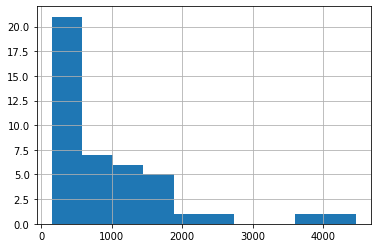

In [ ]:
#prueba...
sorted_acc_2016_por_zona["Nº ACC"].hist()

In [ ]:
fig = px.line(x=sorted_acc_2016_por_zona["ADM_DSTR"], y=sorted_acc_2016_por_zona["Nº ACC"], labels = {"x": "distritos", "y": "nº accidentes"}, title = "Nº de accidentes por zona (2016)")
#ax.set_xlabel(xlabel, rotation=60)
fig.update_xaxes(tickangle=60)
fig.show()